#  Heart Disease Predictive Model
By: Sparkle Russell-Puleri,Ph.D.

Attribute Information:
------------------------
      -- 1.  Age       
      -- 2.  Sex:1 = male; 0 = female          
      -- 3.  cp:chest pain type  (4 values)       
      -- 4.  restbps: resting blood pressure  
      -- 5.  chol: serum cholestoral in mg/dl      
      -- 6.  fbs: fasting blood sugar > 120 mg/dl       
      -- 7.  restecg: resting electrocardiographic results  (values 0,1,2) 
      -- 8.  thalach: maximum heart rate achieved  
      -- 9.  eexang: exercise induced angina    
      -- 10. oldpeak: ST depression induced by exercise relative to rest   
      -- 11. slope: the slope of the peak exercise ST segment     
      -- 12. ca: number of major vessels (0-3) colored by flourosopy        
      -- 13. thal: 3 = normal; 6 = fixed defect; 7 = reversable defect   
      -- 14. num: target variable 1= Presence of disease and 0= Absence
      


# Import Libraries

In [149]:
import pandas as pd
from pandas.tools.plotting import scatter_matrix
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from statsmodels.graphics.mosaicplot import mosaic

%matplotlib inline

# Load and Explore the Dataset

In [171]:
url = 'http://archive.ics.uci.edu/ml/machine-learning-databases/statlog/heart/heart.dat'

In [172]:
data = pd.read_csv(url,names=['Age','Sex','cp','restbps','chol','fbs','restecg','thalach','exang',
                              'oldpeak','slope','ca','thal','num'],sep=' ')

In [173]:
# shape
data.shape

(270, 14)

We an see that the dataset contains 270 instances and 14 attributes

In [206]:
# Check the head of the data set to see the data types.
data.head()

,Age,Sex,cp,restbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,70.0,1.0,4.0,130.0,322.0,0.0,2.0,109.0,0.0,2.4,2.0,3.0,3.0,1
1,67.0,0.0,3.0,115.0,564.0,0.0,2.0,160.0,0.0,1.6,2.0,0.0,7.0,0
2,57.0,1.0,2.0,124.0,261.0,0.0,0.0,141.0,0.0,0.3,1.0,0.0,7.0,1
3,64.0,1.0,4.0,128.0,263.0,0.0,0.0,105.0,1.0,0.2,2.0,1.0,7.0,0
4,74.0,0.0,2.0,120.0,269.0,0.0,2.0,121.0,1.0,0.2,1.0,1.0,3.0,0



Here we can see that the data contains the following attribute types:

Real: 1,4,5,8,10,12
Ordered:11,
Binary: 2,6,9
Nominal:7,3,13

The target attribute,num indicates the absence (1) or presence (2) of heart disease.At first glance we can also see that the raw data is comprised of attributes with varying magnitudes.Therefore, the attributes  will be normalized to ensure that the best classifier performance is obtained.

In [208]:
# Check the data to ensure that the attributes are correctly typed.
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 270 entries, 0 to 269
Data columns (total 14 columns):
Age        270 non-null float64
Sex        270 non-null float64
cp         270 non-null float64
restbps    270 non-null float64
chol       270 non-null float64
fbs        270 non-null float64
restecg    270 non-null float64
thalach    270 non-null float64
exang      270 non-null float64
oldpeak    270 non-null float64
slope      270 non-null float64
ca         270 non-null float64
thal       270 non-null float64
num        270 non-null uint8
dtypes: float64(13), uint8(1)
memory usage: 27.8 KB


In [212]:
data.describe()

,Age,Sex,cp,restbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
count,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.00000,270.000000,270.000000,270.000000,270.000000
mean,54.433333,0.677778,3.174074,131.344444,249.659259,0.148148,1.022222,149.677778,0.329630,1.05000,1.585185,0.670370,4.696296,0.444444
std,9.109067,0.468195,0.950090,17.861608,51.686237,0.355906,0.997891,23.165717,0.470952,1.14521,0.614390,0.943896,1.940659,0.497827
min,29.000000,0.000000,1.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.00000,1.000000,0.000000,3.000000,0.000000
25%,48.000000,0.000000,3.000000,120.000000,213.000000,0.000000,0.000000,133.000000,0.000000,0.00000,1.000000,0.000000,3.000000,0.000000
50%,55.000000,1.000000,3.000000,130.000000,245.000000,0.000000,2.000000,153.500000,0.000000,0.80000,2.000000,0.000000,3.000000,0.000000
75%,61.000000,1.000000,4.000000,140.000000,280.000000,0.000000,2.000000,166.000000,1.000000,1.60000,2.000000,1.000000,7.000000,1.000000
max,77.000000,1.000000,4.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.20000,3.000000,3.000000,7.000000,1.000000


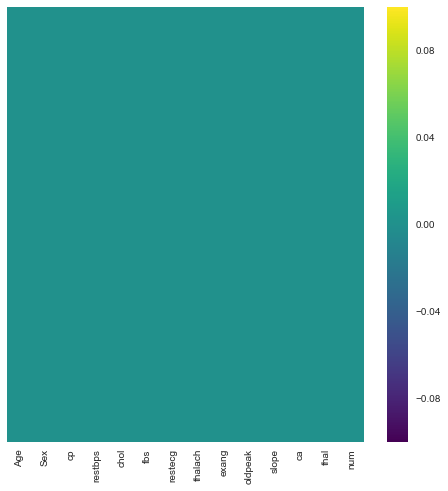

In [214]:
# Checking for missing Data
plt.figure(figsize=(8,8))
sns.heatmap(data.isnull(),yticklabels=False,cmap='viridis')

The uniformity of the above heatmap indicates that there are no missing data. Therefore, we can proceed to preparing and exploring the data.

In [175]:
# Dummify target variable to 0(absence) and 1 (presence) of heart disease.

In [176]:
num = pd.get_dummies(data['num'],drop_first=True)

In [177]:
data = pd.concat([data,num],axis=1)
data.drop('num',axis=1,inplace=True)

In [178]:
data.head()

,Age,Sex,cp,restbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,2
0,70.0,1.0,4.0,130.0,322.0,0.0,2.0,109.0,0.0,2.4,2.0,3.0,3.0,1
1,67.0,0.0,3.0,115.0,564.0,0.0,2.0,160.0,0.0,1.6,2.0,0.0,7.0,0
2,57.0,1.0,2.0,124.0,261.0,0.0,0.0,141.0,0.0,0.3,1.0,0.0,7.0,1
3,64.0,1.0,4.0,128.0,263.0,0.0,0.0,105.0,1.0,0.2,2.0,1.0,7.0,0
4,74.0,0.0,2.0,120.0,269.0,0.0,2.0,121.0,1.0,0.2,1.0,1.0,3.0,0


In [179]:
# Rename target column num
data.rename(columns= {2:'num'},inplace=True)

In [210]:
# Check the head of the dataframe to ensure the change occured.
data.head()

,Age,Sex,cp,restbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,70.0,1.0,4.0,130.0,322.0,0.0,2.0,109.0,0.0,2.4,2.0,3.0,3.0,1
1,67.0,0.0,3.0,115.0,564.0,0.0,2.0,160.0,0.0,1.6,2.0,0.0,7.0,0
2,57.0,1.0,2.0,124.0,261.0,0.0,0.0,141.0,0.0,0.3,1.0,0.0,7.0,1
3,64.0,1.0,4.0,128.0,263.0,0.0,0.0,105.0,1.0,0.2,2.0,1.0,7.0,0
4,74.0,0.0,2.0,120.0,269.0,0.0,2.0,121.0,1.0,0.2,1.0,1.0,3.0,0


** Class Distribution**

In [211]:
# How many cases of heart disease does the data set contain
data.groupby('num').size()

num
0    150
1    120
dtype: int64

# Data Visualization

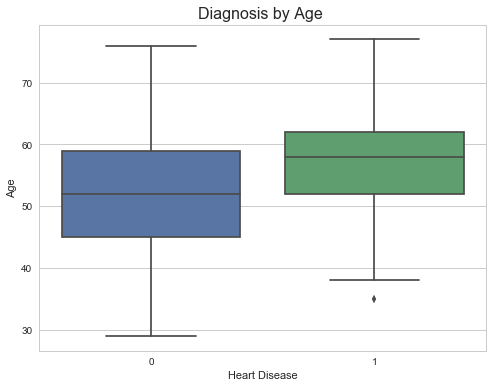

In [205]:
# Box plot of 
_= plt.figure(figsize=(8,6))
_= sns.boxplot(x='num',y='Age',data=data)
_= plt.xlabel('Heart Disease')
_= plt.title("Diagnosis by Age ",fontsize=16)

The dataset contains 150 instances no heart disease and 120 instances of patients with heart disease. Studies have shown that the men are more likely to be at risk for heart attack much earlier in life than women. This is due to the premenopausl protection given by estrogen,however after menopause,  estrogen levels significantly drop. This explains why the for a heart attack is 70 in women, but 66 in men. Knowing this information it would be useful to explore the data to see if these trends exist.

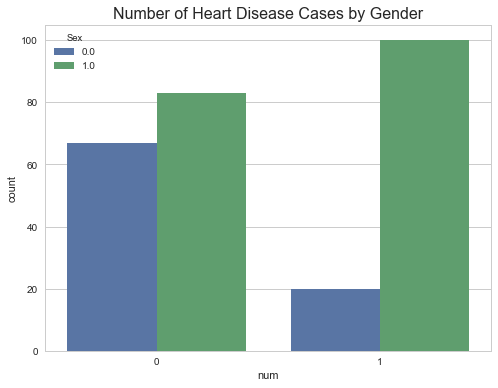

In [201]:
# Visualize the number of disease cases by sex (male =1 and female =0)
sns.set_style('whitegrid')
plt.figure(figsize=(8,6))
sns.countplot(x='num', data=data,hue='Sex')
plt.title('Number of Heart Disease Cases by Gender',fontsize=16)

So far we can see that men had higher instances of heart disease compared to females. Now,what is the average, minimum and maximum age of the men vs. women diagnosed with heart disease?

In [183]:
# Visualize the number of men with heart disease
# plt.figure(figsize=(10,6))
print('Statistics of Men Diagnosed with Heart Disease:')
print('The min age for men diagnosed with heart disease is: %s years'%data[(data['num']==1) & (data['Sex']==1)]['Age'].min())
print('The max age for men diagnosed with heart disease is: %s years'%data[(data['num']==1) & (data['Sex']==1)]['Age'].max())
print('The average age for men diagnosed with heart disease is: %s years'%data[(data['num']==1) & (data['Sex']==1)]['Age'].mean())
print('\n')

print('Statistics of Women Diagnosed with Heart Disease:')
print( 'The min age for wonmen diagnosed with heart disease is: %s years'%data[(data['num']==1) & (data['Sex']==0)]['Age'].min())
print( 'The max age for women diagnosed with heart disease is: %s years'%data[(data['num']==1) & (data['Sex']==0)]['Age'].max())
print( 'The average age for women diagnosed with heart disease is: %s years'%data[(data['num']==1) & (data['Sex']==0)]['Age'].mean())
# .hist(alpha=0.5,color='blue',
#                                               bins=30,label='Credit.Policy=1')
# loans[loans['credit.policy']==0]['fico'].hist(alpha=0.5,color='red',
#                                               bins=30,label='Credit.Policy=0')
# plt.legend()
# plt.xlabel('FICO')

Statistics of Men Diagnosed with Heart Disease:
The min age for men diagnosed with heart disease is: 35.0 years
The max age for men diagnosed with heart disease is: 77.0 years
The average age for men diagnosed with heart disease is: 56.04 years


Statistics of Women Diagnosed with Heart Disease:
The min age for wonmen diagnosed with heart disease is: 43.0 years
The max age for women diagnosed with heart disease is: 66.0 years
The average age for women diagnosed with heart disease is: 59.35 years


According to our data the difference in the minimum age for diagnosis between men and women in this dataset is 8 years. Whereas, the difference in the between the maximum age at which both men and women were first diagnosed is 11 years. Finally, the average age at which both men and women were first diagnosed only differed by 3.31 years, indicating that women are more likely to develop heart disease later in life than men. This data is consistent with a report by Harvard Health titled," Heart attack and stroke: Men vs. women," where they reported that the average age for a first heart attack in women is seven years earlier than in men. 

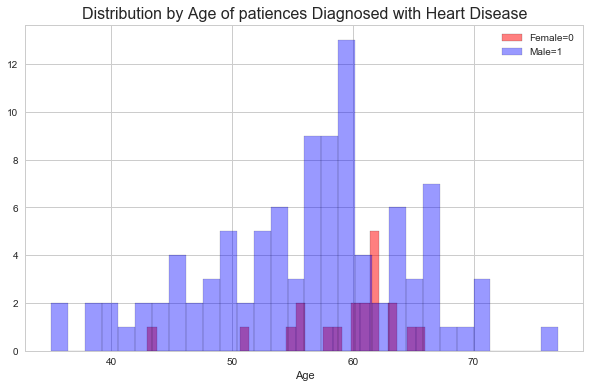

In [220]:
# Visualize the distribution by age between men and women diagnosed with Heart Disease
_= plt.figure(figsize=(10,6))
_= data[(data['Sex']==0)&(data['num']==1)]['Age'].hist(alpha=0.5,color='red',bins=30,edgecolor='k',label='Female=0')

_= data[(data['Sex']==1)&(data['num']==1)]['Age'].hist(alpha=0.4,color='blue',bins=30,edgecolor='k',label='Male=1')
_= plt.title('Distribution by Age of patiences Diagnosed with Heart Disease',fontsize=16)
_= plt.legend()
_= plt.xlabel('Age')


In [221]:
# Export the clean prepared data to a csv file for further processing
data.to_csv('data_cleaned.csv')

### Conclusion:
Based on the intial exloration of the data it is evident that women are more likely to develop heart disease later than men.As such age and gender is likely an attribute that will provide us with helpful insight as we continue to develop the classification algorithm. Next we will spot check some classification algorithms to discover which is best suited for the problem at hand.
**Note:**
Because of the large number of features I will skip the attribute interaction plot part for this project since there are too many features, which can make it hard to interpret.